In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., np.newaxis] / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

def build_model():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),

        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = build_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1)
early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr, early_stop],
    verbose=2
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 - 37s - 79ms/step - accuracy: 0.9153 - loss: 0.8196 - val_accuracy: 0.4784 - val_loss: 1.5413 - learning_rate: 1.0000e-03
Epoch 2/50
469/469 - 20s - 42ms/step - accuracy: 0.9782 - loss: 0.6250 - val_accuracy: 0.9890 - val_loss: 0.5745 - learning_rate: 1.0000e-03
Epoch 3/50
469/469 - 18s - 39ms/step - accuracy: 0.9850 - loss: 0.5951 - val_accuracy: 0.9945 - val_loss: 0.5418 - learning_rate: 1.0000e-03
Epoch 4/50
469/469 - 19s - 41ms/step - accuracy: 0.9875 - loss: 0.5817 - val_accuracy: 0.9934 - val_loss: 0.5412 - learning_rate: 1.0000e-03
Epoch 5/50
469/469 - 18s - 39ms/step - accuracy: 0.9890 - loss: 0.5735 - val_accuracy: 0.9939 - val_loss: 0.5351 - learning_rate: 1.0000e-03
Epoch 6/50
469/469 - 19s - 40ms/step - accuracy: 0.9903 - loss: 0.5678 - val_accuracy: 0.9961 - val_loss: 0.5288 - learning_rate: 1.0000e-03
Epoch 7/50
469/469 - 18s - 39ms/step - accuracy: 0.9914 - loss: 0.5620 - val_accuracy: 0.9950 - val_loss: 0.5356 - learning_rate: 1.0000e-03
Epoch 8/50
469/469 - 19s

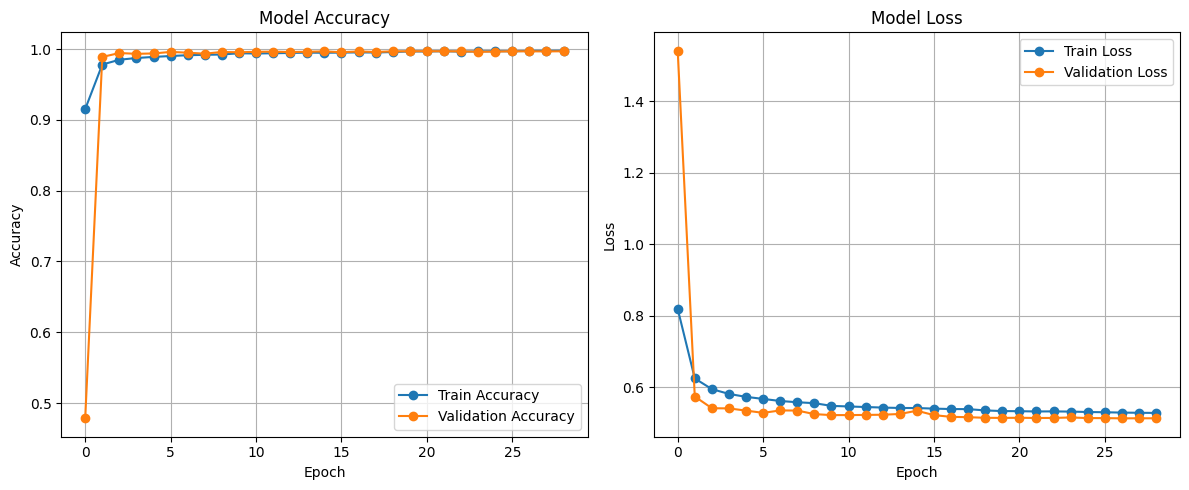

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()
